**Bike Sharing using Linear Regression**

**Problem Statement:** A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. **The company wants to know:**
1.   Which variables are significant in predicting the demand for shared bikes.List item
2.   How well those variables describe the bike demands


**For this problem I will be utilzing Multiple Linear Regression which on broad terms contains the below steps:**
1.   Reading and understanding the data and visualizing
2.   Data preparation: Scaling and splitting the data into testing and training
3.   Building and training the model
4.   Residual Analysis and Predictions
5.   Predictions and evaluations on the test data set








# **Step 1: Reading and understanding the data**

In [93]:
#Importing the required libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt #for visualization
%matplotlib inline
import seaborn as sns #for visualization
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split #for splitting data into training and testing dataset
from sklearn.preprocessing import MinMaxScaler #for scaling the data
from sklearn.metrics import r2_score #checking overall fit of the model

import statsmodels.api as sm #used to build model. Helpful in providing summary
from statsmodels.stats.outliers_influence import variance_inflation_factor #needed to get VIF values to check multicollinearity

from sklearn.feature_selection import RFE #Recursive feature elimination
from sklearn.linear_model import LinearRegression #algorithm we want to use from sklearn

In [94]:
#reading the dataset
sharing=pd.read_csv('day.csv')

In [95]:
#how does data look like in the Application Dataframe
sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [96]:
#Checking basic data types present in the data
sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [97]:
#Checking how does statistics look like for columns
sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [98]:
#It is also worth checking the total number of null values in the dataset
sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the above output we see that there are no null values. So we don't have to deal with imputing values/dropping columns

# **Step 2[A]: Data Preparation for the Model**

In [99]:
#checking what all columns are there in dataset along with values
sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**First inference is we will have to drop the below columns that are either redundant or don't carry any value with them:**

1.   **instant**: This is nothing but an index column so this can be dropped
2.   **dteday**: Yr and mnth column are giving us with specifics about year and month so we can drop this column as well
3.   **casual** and **registered**: count of casual and registered users respectively. Value is specifified in **cnt= casual+registered**. So we can drop both these columns


In [100]:
#Dropping the columns
sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [101]:
#checking the overall info for the dataset again
sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**Second inference** we can make from checking the columns is that all the below columns according to the data dictionary are **categorical variables** but are present are integer datatypes so we will try to map them with correct values and change data types accordingly in the next step.

---


**Categorical variables:**
*   season
*   Yr
*   mnth
*   holiday
*   weekday
*   workingday
*   weathersit










In [102]:
#mapping correct values for season column
sharing['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'}, inplace=True)

In [103]:
#mapping correct values for weathersit that explain the kind of weather we have on the specific day
sharing['weathersit'].replace({1:'Clear',2:'Cloudy_Mist',3:'Light_Rain_Thunderstorm',4:'Heavy_Rain_Thunderstorm'},inplace=True)

In [104]:
#mapping correct values for weekdays
sharing['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

In [105]:
#mapping correct values for mnth
sharing['mnth'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)

In [106]:
#checking our data now after replacing values
sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Cloudy_Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Cloudy_Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# **Step 3: EDA + Visualizing the dataset**

**Columns Categories:**
*   **Numerica**l: temp, atemp, hum, windspeed, cnt
*   **Categorical**: season, yr, mnth, holiday, weekday, workingday, weathersit



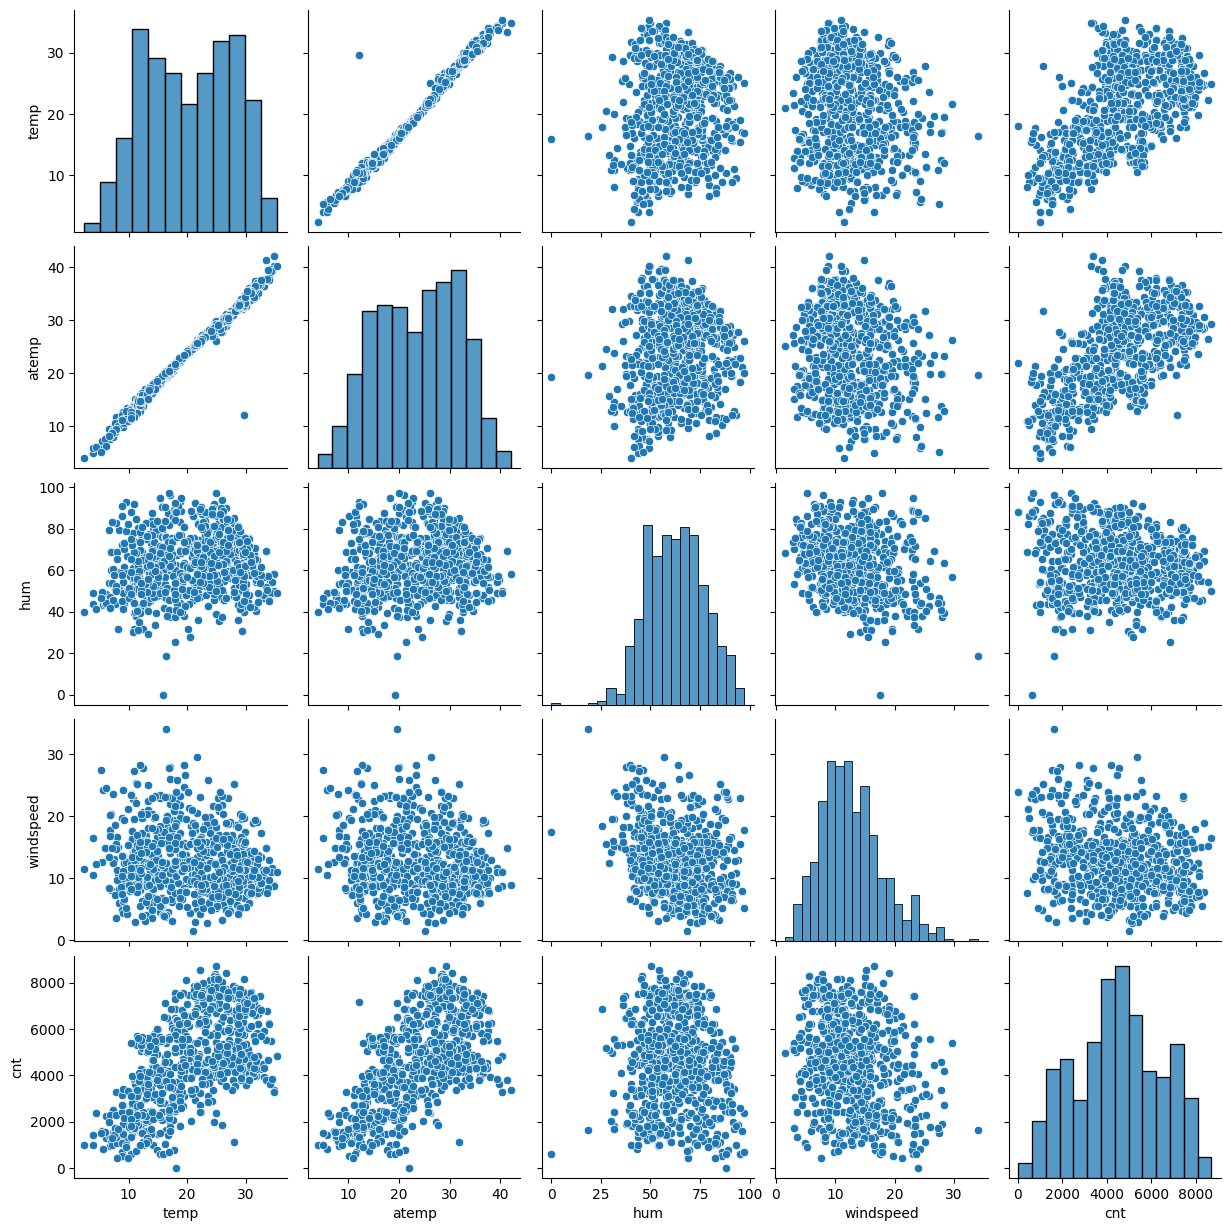

In [107]:
#For the numerical columns pairplots are a good and convenient choice
varlist=['temp','atemp','hum','windspeed','cnt']
sns.pairplot(sharing,vars=varlist,height=2.5)
plt.show()

**Inferences we can make from the above pairplots:**
1.   **temp** and **atemp** shows a very positive correlation almost a straight line. This can portray that values are redundant in both the columns and this can lead to multicollinearity issues.
2.   (**cnt&temp**) and (**cnt & atemp**) also shows a very positive correlation. One simple pointer here can be that with increasing temp people tend to use the bikes more.
3.   (**cnt&hum**) and (**cnt & windspeed**) we see a dispersed correlation.






Text(0, 0.5, 'Bike Rental Count')

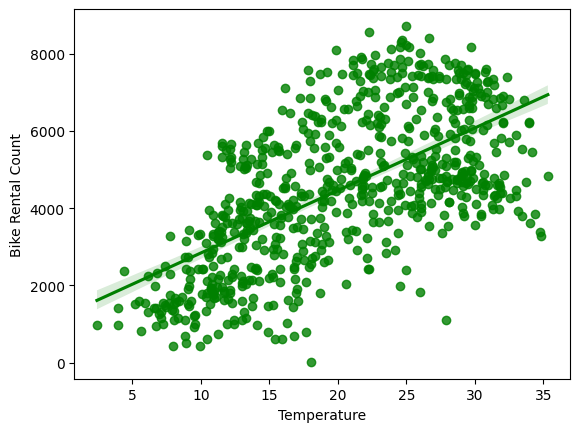

In [108]:
#Plotting a regression plot for cnt and temp
sns.regplot(x='temp',y='cnt',data=sharing, color='green')
plt.xlabel('Temperature')
plt.ylabel('Bike Rental Count')

From the above regression plot we do see that despite of many data points temp is able to explain for cnt, but there seems to be a lot of variance along with increase in temp.

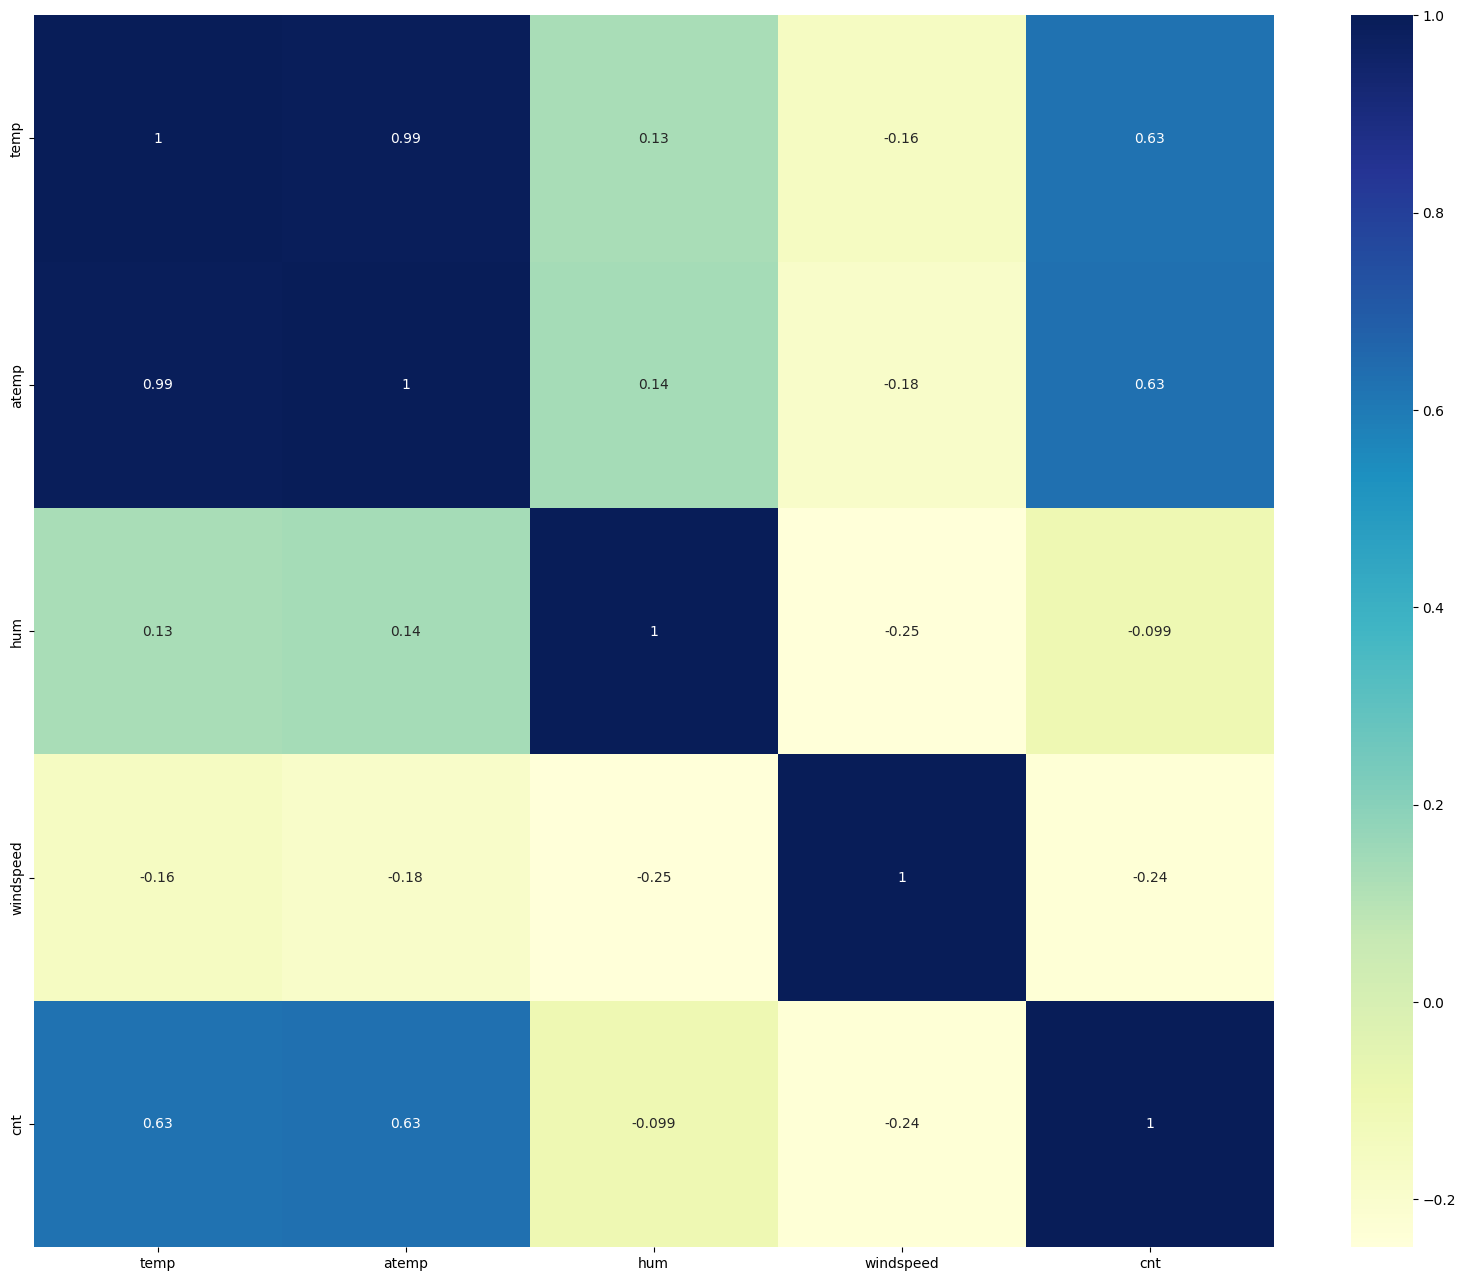

In [109]:
#we can also plot a correlation matrix to see the exact figure of correlation
plt.figure(figsize=(20,16))
sns.heatmap(sharing[['temp','atemp','hum','windspeed','cnt']].corr(),annot = True, cmap="YlGnBu")
plt.show()

The above correlation matrix confirms our inference from the plot between temp and atemp.That there is a very high positive correlation of 0.99. This is a clear indication of data being redundant, so we can drop either one of the columns.

In [110]:
#dropping the atemp variable for ease of analysis further
sharing.drop(['atemp'],axis=1,inplace=True)

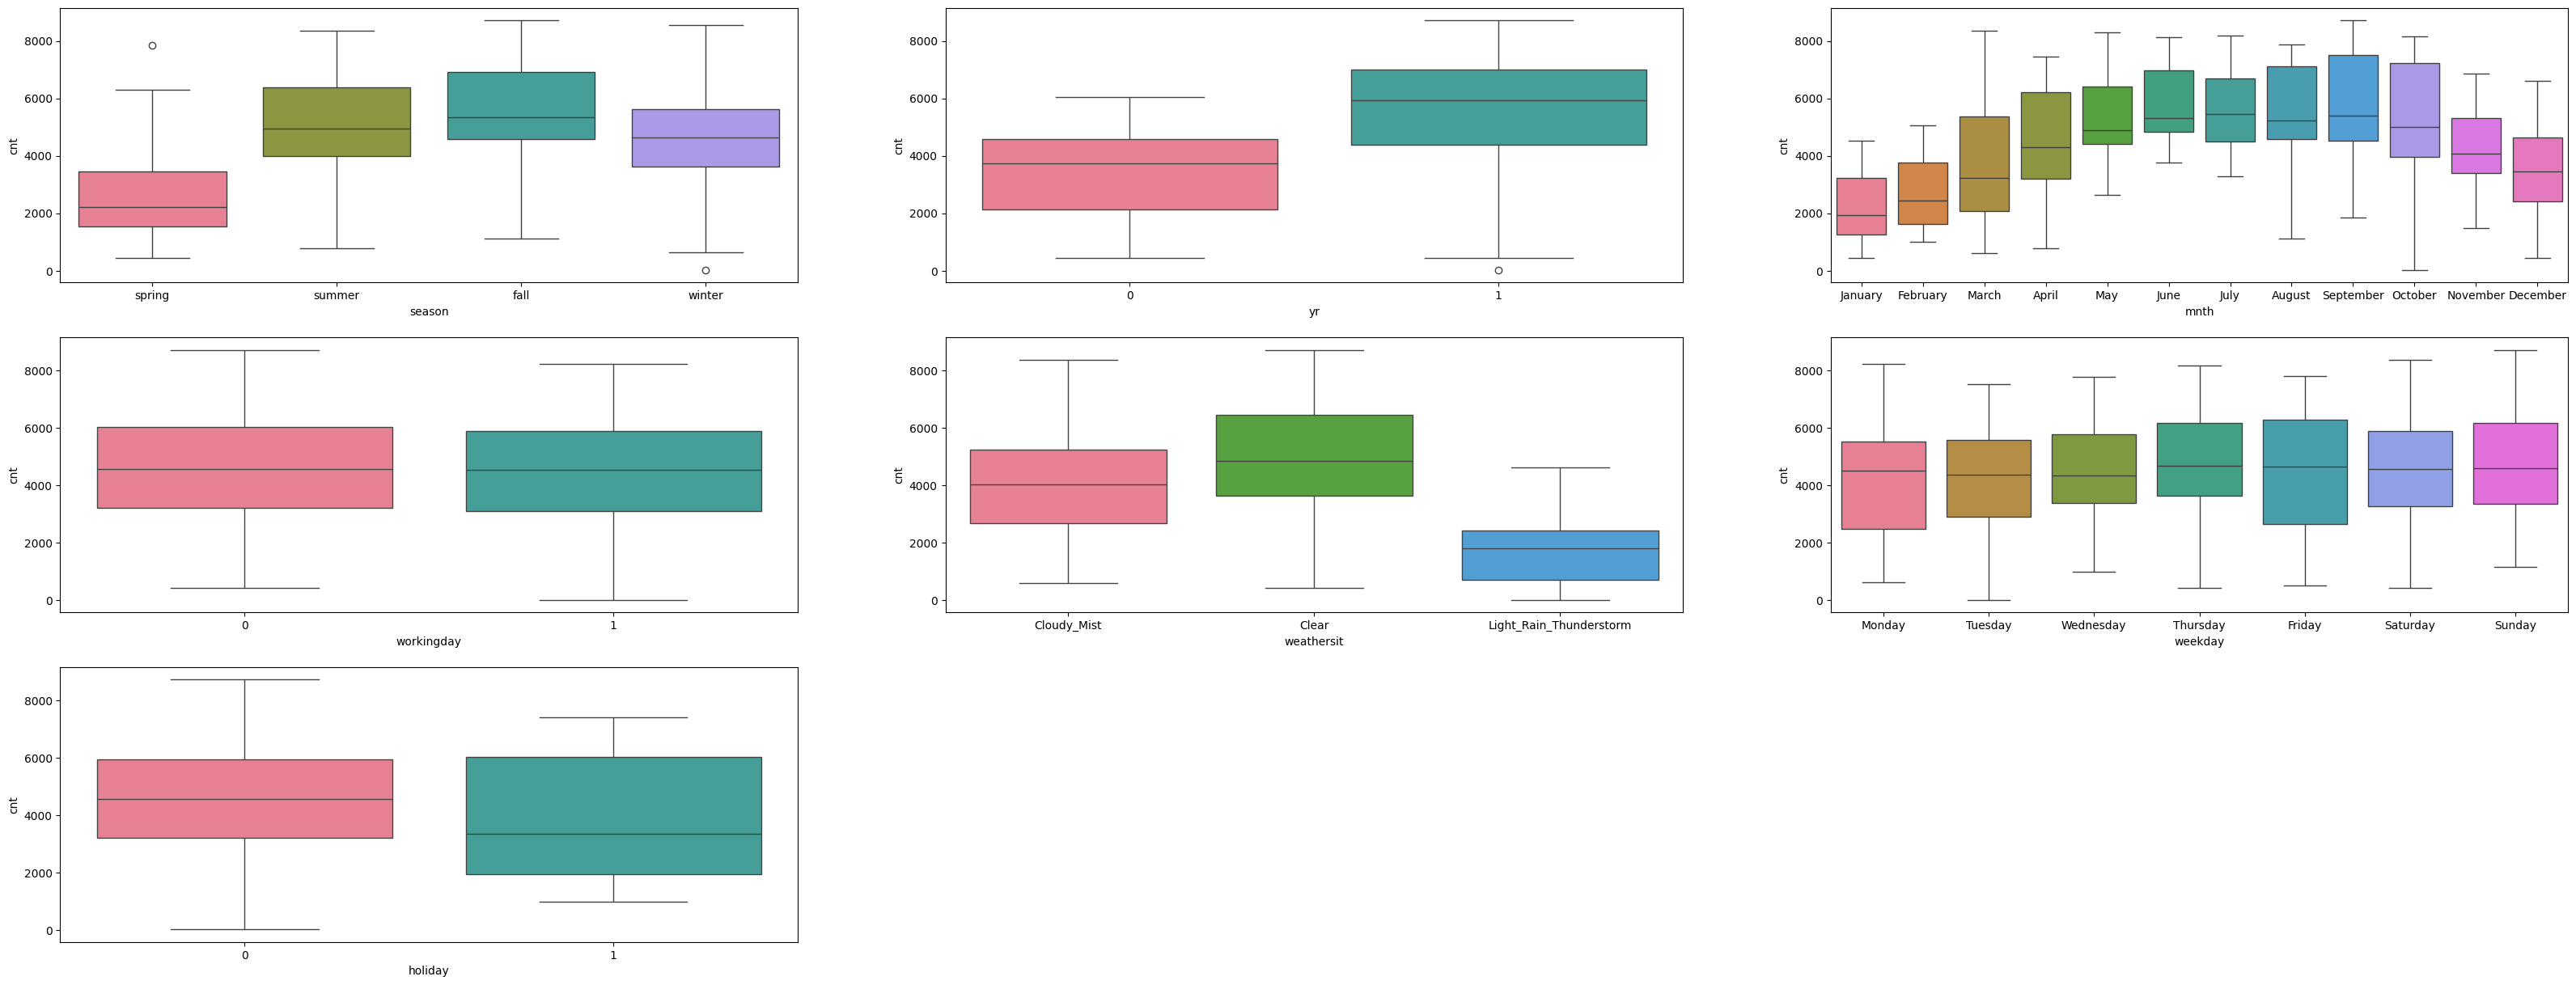

In [111]:
# For the categorical variables we can use box plots and make our inferences
plt.figure(figsize=(40,15))
plt.subplot(3,3,1)

sns.boxplot(x = 'season', y = 'cnt', data = sharing, palette='husl')
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data =sharing, palette='husl' )
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = sharing, palette='husl')
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data =sharing, palette='husl' )
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data =sharing, palette='husl' )
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = sharing, palette='husl')
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = sharing, palette='husl')
plt.show()

**Inferences we can make from the above plots:**


1.   **Season Analysis**: Fall seems to have highest average rentals, followed by summer season.
2.   **Yearly Rentals**: From year 2018 to 2019 there seems to be an increase in the number of rentals
3.   **Monthly Rentals**: In the month of september we see the highest number of monthly rental counts and the surrounding months also shows demand. Increase in bike rentals around september also suggest that there might be a correlation between rentals and season. For example: Fall season starts around month of september.
4.   **Weather temperament**: We can see that clear weather results in high bike rentals.
5.   **Holidays and working days**: Pairing them together because if it's a holiday than it is a non-working day. We see say that there are less rentals on a holiday compared to a working day. As expected considering less people might go outside.This is again a debatable concept but for now this is the inference.
6.   **Weekdays**: The rentals seems to be consistent throughout all the weekdays. So significant increase or decrease in rentals.







# **Step 2[B]: Data Preparation[Creating dummy variables]**

In [112]:
#checking the current data types of current variables present
sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [113]:
#creating dummy variables for categorical columns
seasons=pd.get_dummies(sharing['season'],drop_first=True)
month=pd.get_dummies(sharing['mnth'],drop_first=True)
weekdays=pd.get_dummies(sharing['weekday'],drop_first=True)
weather_types=pd.get_dummies(sharing['weathersit'],drop_first=True)

In [114]:
#dummy variables will be boolean values. For model building we need numeric values. Hence converting them to integer
seasons=seasons.astype('int64')
month=month.astype('int64')
weekdays=weekdays.astype('int64')
weather_types=weather_types.astype('int64')

In [115]:
#concatenating the dummy variables with the sharing dataset
sharing=pd.concat([sharing,seasons],axis=1)
sharing=pd.concat([sharing,month],axis=1)
sharing=pd.concat([sharing,weekdays],axis=1)
sharing=pd.concat([sharing,weather_types],axis=1)

In [116]:
#checking how the dataset looks like now
sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
0,spring,0,January,0,Monday,1,Cloudy_Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,0,January,0,Tuesday,1,Cloudy_Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
#Deleting the original columns from the dataset
sharing.drop(['season'],axis=1,inplace=True)
sharing.drop(['mnth'],axis=1,inplace=True)
sharing.drop(['weekday'],axis=1,inplace=True)
sharing.drop(['weathersit'],axis=1,inplace=True)

In [118]:
sharing.head()
sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   hum                      730 non-null    float64
 5   windspeed                730 non-null    float64
 6   cnt                      730 non-null    int64  
 7   spring                   730 non-null    int64  
 8   summer                   730 non-null    int64  
 9   winter                   730 non-null    int64  
 10  August                   730 non-null    int64  
 11  December                 730 non-null    int64  
 12  February                 730 non-null    int64  
 13  January                  730 non-null    int64  
 14  July                     7

# **Step 4: Building Multiple Linear Regression Model**



*   Splitting the data between training and testing data set
*   Scaling the values of the training data se
*   Building model and then choosing our variables





## **Step 4(A): Splitting the dataset**

In [119]:
#splitting the data
#random_state has been used so that our results for the model we are building are reproducible
sharing_train, sharing_test=train_test_split(sharing,train_size=0.7, test_size=0.3,random_state=42)

In [120]:
#checking the columns once
sharing_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy_Mist', 'Light_Rain_Thunderstorm'],
      dtype='object')

In [121]:
#checking the data
sharing_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
683,1,0,1,13.188347,62.0417,10.250129,5445,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
645,1,1,0,15.716653,70.9583,12.708493,5478,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
163,0,0,1,26.035000,49.4583,20.458450,5020,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
360,0,0,1,13.325000,76.2500,12.626150,1162,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [122]:
#checking the testing data
sharing_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
468,1,0,0,20.295000,50.2917,12.791439,7460,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
148,0,0,1,27.367500,81.8750,14.333846,4788,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
302,0,0,1,13.085847,62.3750,11.833339,3331,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
355,0,0,0,17.356653,75.7500,3.167425,3068,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
515,1,0,1,27.880000,49.2917,13.083693,7338,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## **Step 4(B): Scaling the numerical features**

In [123]:
#now let's take a look at the training data once
#we see that numerical columns have values in different range. Not lying in same scale.
#When we will built a model with these varying data ranges we can see skewed results. Such as large range values can dominate the model results
sharing_train.head()

#creating the object of MinMaxScaler()
scaler=MinMaxScaler()

In [124]:
#since we have to only scale the numerical features creating a list
num_vars=['temp','hum','windspeed','cnt']

sharing_train[num_vars]=scaler.fit_transform(sharing_train[num_vars])

In [125]:
##verifying whether min-max scaling has worked
sharing_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
683,1,0,1,0.327133,0.639330,0.327101,0.605336,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.731215,0.419004,0.609320,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
163,0,0,1,0.717562,0.509660,0.708724,0.554026,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.785745,0.415925,0.088253,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.817947,0.110593,0.862127,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


From the above output we see that all maximum values are 1. This means our data for numerical variables is now normalized.

## **Step 4(C): Creating X_train and Y_train**

In [126]:
#creating X_train and Y_train
y_train=sharing_train.pop('cnt') #because cnt is our target variable for which we would like to predict values
X_train=sharing_train

In [127]:
#checking X_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [128]:
#checking y_train
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

## **Step 4(D): Start of Model Building Process**

### **Model 1: Model created with all the variables**

In [129]:
#Starting by creating a model with all the independent variables included and checking now the overall r2 score our deciding metric look like
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [130]:
#Using statsmodel to create the model
X_train_sm=sm.add_constant(X_train) #by default statsmodel does not include the constant[intercept] in the equation

#creating the model object
lr=sm.OLS(y_train, X_train_sm)

#fitting the model: This is the step wherewe are actually learning the coefficients
model2=lr.fit()

#checking the parameters
model2.summary()
model2.params

const                      0.336249
yr                         0.235669
holiday                   -0.071361
workingday                -0.003094
temp                       0.441822
hum                       -0.160749
windspeed                 -0.120517
spring                    -0.147873
summer                     0.013273
winter                     0.074379
August                    -0.012124
December                  -0.037733
February                   0.013952
January                   -0.000167
July                      -0.045200
June                      -0.001599
March                      0.049993
May                        0.028504
November                  -0.049313
October                    0.040914
September                  0.071699
Monday                    -0.031629
Saturday                  -0.000997
Sunday                     0.006619
Thursday                  -0.000510
Tuesday                   -0.021732
Wednesday                 -0.022835
Cloudy_Mist               -0

In [131]:
#checking the VIF for all the variables
vif=pd.DataFrame()

vif['Features']=X_train.columns

vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
2,workingday,76.80
3,temp,46.38
4,hum,43.47
21,Saturday,16.29
22,Sunday,14.86
6,spring,13.83
8,winter,11.01
7,summer,10.24
17,November,7.38
5,windspeed,7.36


**Inferences from Model 1 built using all variables:**
*   R2 score and adjusted r2 score seem to be pretty good for the model.
*   In a multiple linear regression model we check two things: p-values and VIF
*   Although we have good r2 score values but we see there are many variables that have very very high p-values and VIF.
*   This suggests we might be observing this high value because of correlation among the variables that is multicollinearity. A VIF of 76.80 is off the roof from the acceptable limits which is upto 5.
*   This leads us to conclusion that we can either work and improve this model or we can use a different approach for model building. Since we have around 28 independent variables dealing with them one by one is a difficult method. Hene going forward I am selecting a more automatic approach for feature selection.







## **Model 2: Using RFE for automatic feature selection**

**RFE: Recurcive Feature Elimination**
Feature ranking method. An external eliminator is used that assigns weight to the features.

In [132]:
#Starting with 20 variables and this time going with automatic and manual approach
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe =RFE(lm, n_features_to_select=20)  # running RFE
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [133]:
#now we will run the code of how the rfe would select the columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 3),
 ('December', True, 1),
 ('February', False, 2),
 ('January', False, 9),
 ('July', True, 1),
 ('June', False, 6),
 ('March', True, 1),
 ('May', True, 1),
 ('November', True, 1),
 ('October', True, 1),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 7),
 ('Sunday', False, 4),
 ('Thursday', False, 8),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Cloudy_Mist', True, 1),
 ('Light_Rain_Thunderstorm', True, 1)]

In [134]:
#columns selected by RFE
columns=X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'July', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [135]:
#columns that were not selected by the RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'August', 'February', 'January', 'June', 'Saturday',
       'Sunday', 'Thursday'],
      dtype='object')

We will now use the columns selected by RFE and try to build a model using Statsmodel

**Model 2[A]: All variables selected by RFE**

In [136]:
#Using statsmodel to create the model
#creating a test dataframe using the columns that were selected by the RFE
X_train_rfe=X_train[columns]
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'July', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [137]:
#adding a constant variable for statsmodels
X_train_rfe_sm=sm.add_constant(X_train_rfe)

#Running the linear regression model

lm=sm.OLS(y_train, X_train_rfe_sm).fit()

#checking the summary of the model we have built
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          1.19e-183
Time:                        19:58:02   Log-Likelihood:                 493.97
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     489   BIC:                            -857.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Although the R2 score is very good in this model i.e. 0.845 but we do see a lot of variables have high p-values in the above statsmodels namely: Winter season[0.245], May[0.109], October[0.123] to name a few. In next step we will check the VIF and see the multicollinearity among these variables.

In [138]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'July', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [139]:
#Checking VIF

vif=pd.DataFrame()

X=X_train_rfe

vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
3,hum,28.94
2,temp,17.38
7,winter,8.17
4,windspeed,5.97
5,spring,4.21
12,November,4.09
13,October,3.99
6,summer,3.74
18,Cloudy_Mist,2.27
8,December,2.15


Inferences made from the significance and the VIF:
**hum, temp, winter and windspeed** have high VIF far above the

1.   **hum, temp, winter and windspeed** have high VIF far above the considerable limit of 5.
2.   However we see the significance of all the four variables is 0.00, 0.00, 0.02 and 0.00 indicating that variables are carrying a high significance.

So for our next model we will try to build a model without the variable hum and check the significance and VIF to look for improvement.

**Model 2[B]: Dropping the hum variable**

In [140]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'July', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [141]:
#dropping the hum column
X_train_new1=X_train_rfe.drop(['hum'],axis=1)
X_train_new1.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'December', 'July', 'March', 'May', 'November', 'October', 'September',
       'Monday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [142]:
#adding a constant variable for statsmodels
X_train_new_sm1=sm.add_constant(X_train_new1)

#Running the linear regression model

model3=sm.OLS(y_train, X_train_new_sm1).fit()

#checking the summary of the model we have built
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          2.67e-181
Time:                        19:58:02   Log-Likelihood:                 485.69
No. Observations:                 510   AIC:                            -931.4
Df Residuals:                     490   BIC:                            -846.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [143]:
#Checking VIF as well
#Checking VIF

vif=pd.DataFrame()

X=X_train_new1

vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
6,winter,7.70
2,temp,6.47
3,windspeed,5.94
12,October,3.95
11,November,3.93
5,summer,3.34
4,spring,2.47
0,yr,2.11
7,December,2.05
8,July,1.88


**Inferences of Model 2[B]: A model without hum variable**
*   Overall model fit still seems pretty good with a score of 0.840 and adjusted R2 score of 0.834.
*   On the other hand we see that after dropping the variable hum we saw that VIF values for winter, temp and windspeed that earlier had values more than 10 have now reduced to less than 10. Suggesting that removing the hum variable seems to be correct step at this time considering we didn't see a significant decline in R2 score and VIF reduced by a huge margin.

**Next model ** we see a lot of variables with high p-values now such as May 0.278, Summer 0.219 and october 0.219.

**Let's try dropping variable May and check the score.**

**Model 2[C]: Dropping the May variable**

In [144]:
#dropping the hum column
X_train_new2=X_train_new1.drop(['May'],axis=1)
X_train_new2.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'December', 'July', 'March', 'November', 'October', 'September',
       'Monday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [145]:
#adding a constant variable for statsmodels
X_train_new_sm2=sm.add_constant(X_train_new2)

#Running the linear regression model

model4=sm.OLS(y_train, X_train_new_sm2).fit()

#checking the summary of the model we have built
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          3.94e-182
Time:                        19:58:03   Log-Likelihood:                 485.08
No. Observations:                 510   AIC:                            -932.2
Df Residuals:                     491   BIC:                            -851.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [146]:
#Checking VIF as well
vif=pd.DataFrame()

X=X_train_new2

vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
6,winter,7.69
2,temp,6.37
3,windspeed,5.84
11,October,3.94
10,November,3.93
5,summer,2.69
4,spring,2.44
0,yr,2.11
7,December,2.05
8,July,1.88


**Model 2[D]: Dropping the October variable**

In [147]:
#dropping the hum column
X_train_new3=X_train_new2.drop(['October'],axis=1)
X_train_new3.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'December', 'July', 'March', 'November', 'September', 'Monday',
       'Tuesday', 'Wednesday', 'Cloudy_Mist', 'Light_Rain_Thunderstorm'],
      dtype='object')

In [148]:
#adding a constant variable for statsmodels
X_train_new_sm3=sm.add_constant(X_train_new3)

#Running the linear regression model

model5=sm.OLS(y_train, X_train_new_sm3).fit()

#checking the summary of the model we have built
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          6.64e-183
Time:                        19:58:03   Log-Likelihood:                 484.30
No. Observations:                 510   AIC:                            -932.6
Df Residuals:                     492   BIC:                            -856.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [149]:
#Checking VIF as well
vif=pd.DataFrame()

X=X_train_new3

vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
2,temp,6.25
3,windspeed,5.83
6,winter,2.88
5,summer,2.61
4,spring,2.44
0,yr,2.10
8,July,1.83
10,November,1.79
15,Cloudy_Mist,1.60
11,September,1.44


**Inferences from the model after dropping October Variable:**


*   From previous model we have seen that after dropping October variable we now only have 6 variables with high p-values. While December and Nov that earlier had high p-values have now become significant.
*   One major change we have seen in winter variable. VIF for winter dropped from 7.69 to 2.88.

**Summary:** So far we have dropped four variables **hum, May and October**. After dropping them we still see very good R2 and Adjuested R2 score values. And decrease in p-values and VIF.

**Next action**: Now we have seen that although summer season has a VIF of 2.61, p-value is currently very high for this variable. And it has been high since the start of the model building process.

In summer season we see people can use bikes considering hot weather but also from a population standpoint people might prefer to use some other vehicle other than bikes which is not the context of this model. So this variable can be important. We will make the model inferences after dropping this variable and checking the changes.



**Model 2[E]: Dropping the Summer variable**

In [150]:
#dropping the hum column
X_train_new4=X_train_new3.drop(['summer'],axis=1)
X_train_new4.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'December',
       'July', 'March', 'November', 'September', 'Monday', 'Tuesday',
       'Wednesday', 'Cloudy_Mist', 'Light_Rain_Thunderstorm'],
      dtype='object')

In [151]:
#adding a constant variable for statsmodels
X_train_new_sm4=sm.add_constant(X_train_new4)

#Running the linear regression model

model6=sm.OLS(y_train, X_train_new_sm4).fit()

#checking the summary of the model we have built
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          2.05e-183
Time:                        19:58:03   Log-Likelihood:                 482.86
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     493   BIC:                            -859.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [152]:
#Checking VIF as well
vif=pd.DataFrame()

X=X_train_new4

vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
2,temp,5.58
3,windspeed,5.21
5,winter,2.39
0,yr,2.09
4,spring,1.86
9,November,1.79
14,Cloudy_Mist,1.58
7,July,1.44
13,Wednesday,1.34
6,December,1.33


**Inferences of model after dropping summer variable:**
*   As such we don't see any major change in p-values of variables except one July variable that earlier had high p-value of 0.053 has now become significant with 0.00 p-value.
*   And we do see slight change in VIF of temp and windspeed which now sit at 5.58 and 5.21

**Next action:** Wednesday and Tuesday right now carry a high p-value of 0.031 and 0.022. Considering during weekdays people tend to use less bikes. These variables might not be so significant.

We will drop first wednesday and then after looking at model we will take a call whether to drop Tuesday variable or not.



**Model 2[F]: Dropping the Wednesday variable**

In [153]:
#dropping the wednesday column
X_train_new5=X_train_new4.drop(['Wednesday'],axis=1)
X_train_new5.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'December',
       'July', 'March', 'November', 'September', 'Monday', 'Tuesday',
       'Cloudy_Mist', 'Light_Rain_Thunderstorm'],
      dtype='object')

In [154]:
#adding a constant variable for statsmodels
X_train_new_sm5=sm.add_constant(X_train_new5)

#Running the linear regression model

model7=sm.OLS(y_train, X_train_new_sm5).fit()

#checking the summary of the model we have built
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.2
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          1.57e-183
Time:                        19:58:03   Log-Likelihood:                 480.45
No. Observations:                 510   AIC:                            -928.9
Df Residuals:                     494   BIC:                            -861.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [155]:
#Checking VIF as well
vif=pd.DataFrame()

X=X_train_new5

vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
2,temp,5.46
3,windspeed,5.17
5,winter,2.39
0,yr,2.09
4,spring,1.85
9,November,1.79
13,Cloudy_Mist,1.58
7,July,1.44
6,December,1.33
10,September,1.24


**Inferences of model after dropping Wednesday variable:**
*   One major change we have seen here that holiday variable that earlier had high p-value of 0.018 has now become significant with significance of 0.03 .
*   But variable Monday on other hand have become slightly insignificant with increase in p-value from 0.03 to 0.09.

**Next action:** Drop variable Tuesday since it's p-value has increased very significantly from 0.022 to 0.063.





**Model 2[G]: Dropping the Tuesday variable**

In [156]:
#dropping the tuesday column
X_train_new6=X_train_new5.drop(['Tuesday'],axis=1)
X_train_new6.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'December',
       'July', 'March', 'November', 'September', 'Monday', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [157]:
#adding a constant variable for statsmodels
X_train_new_sm6=sm.add_constant(X_train_new6)

#Running the linear regression model

model8=sm.OLS(y_train, X_train_new_sm6).fit()

#checking the summary of the model we have built
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          6.41e-184
Time:                        19:58:03   Log-Likelihood:                 478.67
No. Observations:                 510   AIC:                            -927.3
Df Residuals:                     495   BIC:                            -863.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [158]:
#Checking VIF as well
vif=pd.DataFrame()

X=X_train_new6

vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
2,temp,5.45
3,windspeed,5.10
5,winter,2.38
0,yr,2.09
4,spring,1.83
9,November,1.79
12,Cloudy_Mist,1.57
7,July,1.44
6,December,1.33
10,September,1.24


**Inferences from model after dropping Tuesday variable:**
*   We don't see major changes in this model except variable Monday that high p-value has now seen an increase from 0.09 to 0.022.
*   No major change in VIF values except we see the trend that temp and windspeed have seen decline after removing high p-values.

**Next action:**Drop the variable Monday[high p-value 0.022]

**Model 2[H]: Dropping the Monday variable**

In [159]:
#dropping the tuesday column
X_train_new7=X_train_new6.drop(['Monday'],axis=1)
X_train_new7.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'December',
       'July', 'March', 'November', 'September', 'Cloudy_Mist',
       'Light_Rain_Thunderstorm'],
      dtype='object')

In [160]:
#adding a constant variable for statsmodels
X_train_new_sm7=sm.add_constant(X_train_new7)

#Running the linear regression model

model9=sm.OLS(y_train, X_train_new_sm7).fit()

#checking the summary of the model we have built
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          6.15e-184
Time:                        19:58:03   Log-Likelihood:                 475.97
No. Observations:                 510   AIC:                            -923.9
Df Residuals:                     496   BIC:                            -864.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [161]:
#Checking VIF as well
vif=pd.DataFrame()

X=X_train_new7

vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["VIF"]=round(vif["VIF"],2)

vif=vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
2,temp,5.43
3,windspeed,5.05
5,winter,2.38
0,yr,2.09
4,spring,1.82
9,November,1.79
11,Cloudy_Mist,1.57
7,July,1.44
6,December,1.33
10,September,1.24


**Inferences after dropping Monday variable:**
*   Slight change in p-values of some variables such as Septmber, July etc. But all are within acceptable limit under 0.05.
*   temp and windspeed VIF is still slightly greater than 5 i.e. 5.43 and 5.05 respectively.

**Summary:** Now we see that all variables have significant p-values and only temp and windspeed have high VIF but still they are acceptable. This is a good enough model now.

**R2 score value:** 0.834
**Adjusted R2 score value:** 0.0830

Both are very good values for a model.

# **Step 5: Residual Analysis and Predictions**

Our above model 2[H] seems to have good R2 score and significant p-values and VIF. Let's utilize this model and see how it works out on test data.

## **Step 5[A]: Residual Analysis**

To test this we will check whether error terms[difference between actual y values and predicted y values]

**Starting by checking whether error terms are normally distributed or not**

In [162]:
#we are now using our linear regression model for residual analysis
y_train_pred=model9.predict(X_train_new_sm7)

In [163]:
#computing the residuals
res=y_train-y_train_pred

Text(0.5, 1.0, 'Residual Plot')

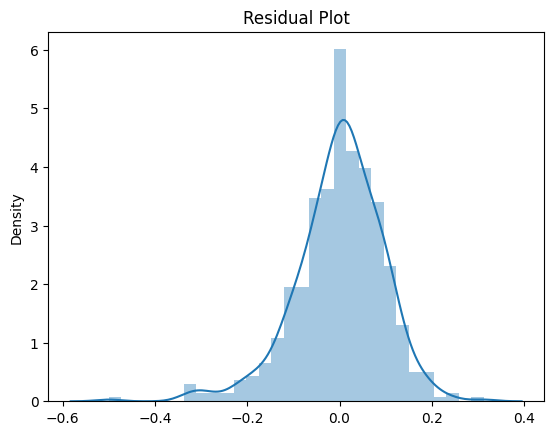

In [164]:
#plotting the histogram for the error terms to check if they are normally distributed
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

The error terms seems to be normally distributed because means seems to be centered around zero

In [165]:
#checking whether error terms are independent of each other
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(res)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 2.058022049766376


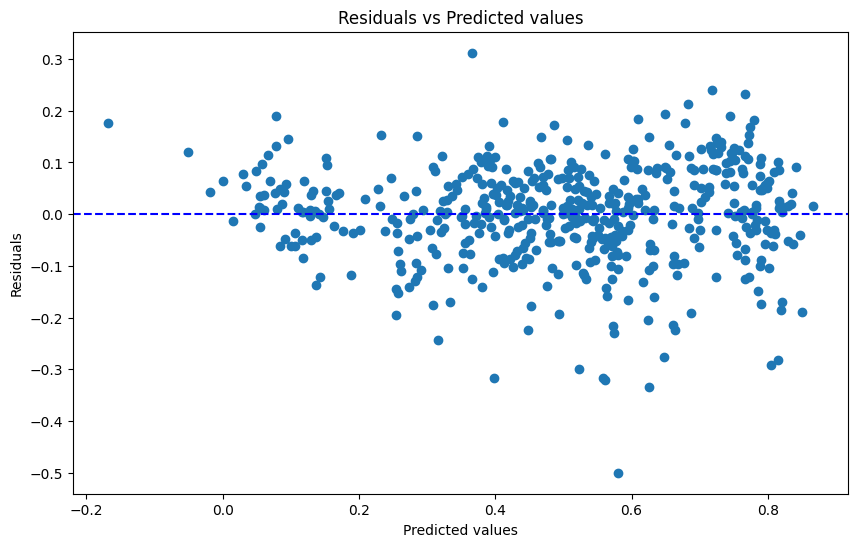

In [166]:
#checking whether error terms have constant variance
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, res)
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

## **Step 5[B]: Making Predictions using our final model**

**Checking how the model is performing on the training data set**

In [167]:
r2score=r2_score(y_true=y_train,y_pred=y_train_pred)
r2score

0.834166701130912

Few things we will have to perform on testing data set before making the predictions:
*   Scaling the values like we did in training data set
*   Adjusting columns in testing data set according to the model we have built.



In [168]:
#checking values of our sharing test data once
sharing_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
468,1,0,0,20.295000,50.2917,12.791439,7460,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
148,0,0,1,27.367500,81.8750,14.333846,4788,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
302,0,0,1,13.085847,62.3750,11.833339,3331,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
355,0,0,0,17.356653,75.7500,3.167425,3068,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
515,1,0,1,27.880000,49.2917,13.083693,7338,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [169]:
#scaling our numerical variables in the dataset like we did in the traiing data set
num_vars=['temp','hum','windspeed','cnt']

#now this step is important. we are using the same scaler we used on training data set
#here we don't want the model to learn anything so fitting the data is not performed on testing data set. It is only done on training data set
sharing_test[num_vars]=scaler.transform(sharing_test[num_vars])
sharing_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
468,1,0,0,0.543115,0.518248,0.422104,0.848606,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
148,0,0,1,0.758058,0.843709,0.479765,0.526017,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
302,0,0,1,0.324018,0.642765,0.386287,0.350115,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
355,0,0,0,0.453814,0.780592,0.062325,0.318363,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
515,1,0,1,0.773634,0.507943,0.433030,0.833877,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [170]:
#verifying that values have been scaled properly
sharing_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.671233,0.527468,0.629546,0.435511,0.479553,0.283105,0.237443,0.228311,0.109589,0.109589,0.082192,0.077626,0.068493,0.077626,0.136986,0.068493,0.059361,0.073059,0.063927,0.132420,0.141553,0.164384,0.159817,0.114155,0.164384,0.315068,0.027397
std,0.498836,0.176306,0.470841,0.229936,0.152584,0.212750,0.233091,0.451539,0.426491,0.420705,0.313092,0.313092,0.275286,0.268194,0.253169,0.268194,0.344621,0.253169,0.236840,0.260830,0.245183,0.339723,0.349389,0.371472,0.367276,0.318728,0.371472,0.465607,0.163612
min,0.000000,0.000000,0.000000,0.047675,0.193646,0.060760,-0.049378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.520479,0.281156,0.285826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.608416,0.416900,0.471206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.735901,0.534288,0.644151,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.970925,1.002146,1.214955,0.980804,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Value of all the numerical variables is between 0-1. So values have indeed been scaled properly.

In [171]:
#making predictions now
#getting appropriate dataframes for prediction now

y_test=sharing_test.pop('cnt')

X_test=sharing_test

In [172]:
#checking the y_test
y_test.head()

468    0.848606
148    0.526017
302    0.350115
355    0.318363
515    0.833877
Name: cnt, dtype: float64

In [173]:
#checking X_test
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
468,1,0,0,0.543115,0.518248,0.422104,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
148,0,0,1,0.758058,0.843709,0.479765,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
302,0,0,1,0.324018,0.642765,0.386287,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
355,0,0,0,0.453814,0.780592,0.062325,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
515,1,0,1,0.773634,0.507943,0.433030,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [174]:
#adding the constant now

X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain_Thunderstorm
468,1.0,1,0,0,0.543115,0.518248,0.422104,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
148,1.0,0,0,1,0.758058,0.843709,0.479765,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
302,1.0,0,0,1,0.324018,0.642765,0.386287,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
355,1.0,0,0,0,0.453814,0.780592,0.062325,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
515,1.0,1,0,1,0.773634,0.507943,0.433030,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Removing the features that were not a part of our final model. So below features we have to remove:
1. hum
2. workingday
3. summer
4. August
5. February
6. January
7. June
8. May
9. October
10. Monday
11. Saturday
12. Sunday
13. Thursday
14. Wednesday
15. Tuesday

In [175]:
#dropping columns that were not a part of final model
X_test_sm=X_test_sm.drop(['hum','workingday','summer','August','February','January','June','May','October','Monday','Saturday','Sunday','Thursday','Wednesday'], axis=1)

In [176]:
#dropping the column Tuesday as well which was not part of final model
X_test_sm=X_test_sm.drop(['Tuesday'],axis=1)

In [177]:
#checking the testing data set now
X_test_sm.head()

,const,yr,holiday,temp,windspeed,spring,winter,December,July,March,November,September,Cloudy_Mist,Light_Rain_Thunderstorm
468,1.0,1,0,0.543115,0.422104,0,0,0,0,0,0,0,0,0
148,1.0,0,0,0.758058,0.479765,0,0,0,0,0,0,0,0,0
302,1.0,0,0,0.324018,0.386287,0,1,0,0,0,0,0,0,0
355,1.0,0,0,0.453814,0.062325,1,0,1,0,0,0,0,1,0
515,1.0,1,0,0.773634,0.433030,0,0,0,0,0,0,0,0,0


In [178]:
#now we are going to calculate the predicted values
y_pred_test=model9.predict(X_test_sm)

In [179]:
#evaluating the model now
#calculating the r2_score

r2score=r2_score(y_true=y_test,y_pred=y_pred_test)
r2score

0.8222129472298976

**R2 score for our model on testing data set came around to be 0.822 which is a pretty good value for our model.**

In [180]:
#also checking the value of Adjusted R2 score
n=len(y_test)
p_simple= 13 #we have in total 13 predictor variables
adjusted_r2score = 1 - (1 - r2score) * (n - 1) / (n - p_simple - 1)
adjusted_r2score

0.8109386463225252

**We saw that value of our adjusted R2 score is also 0.810 which is within acceptable limit of 5% r2 score. So overall our model is able to explain good variability in the testing data set.Meaning the model built is able to perform really good on unseen data set**

Text(0, 0.5, 'y_pred')

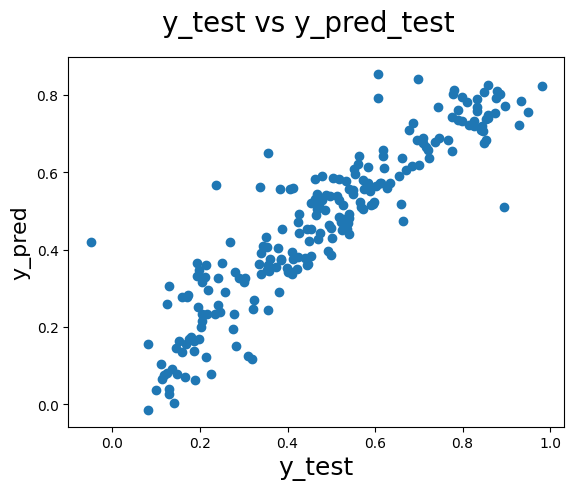

In [181]:
#checking actual vs predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

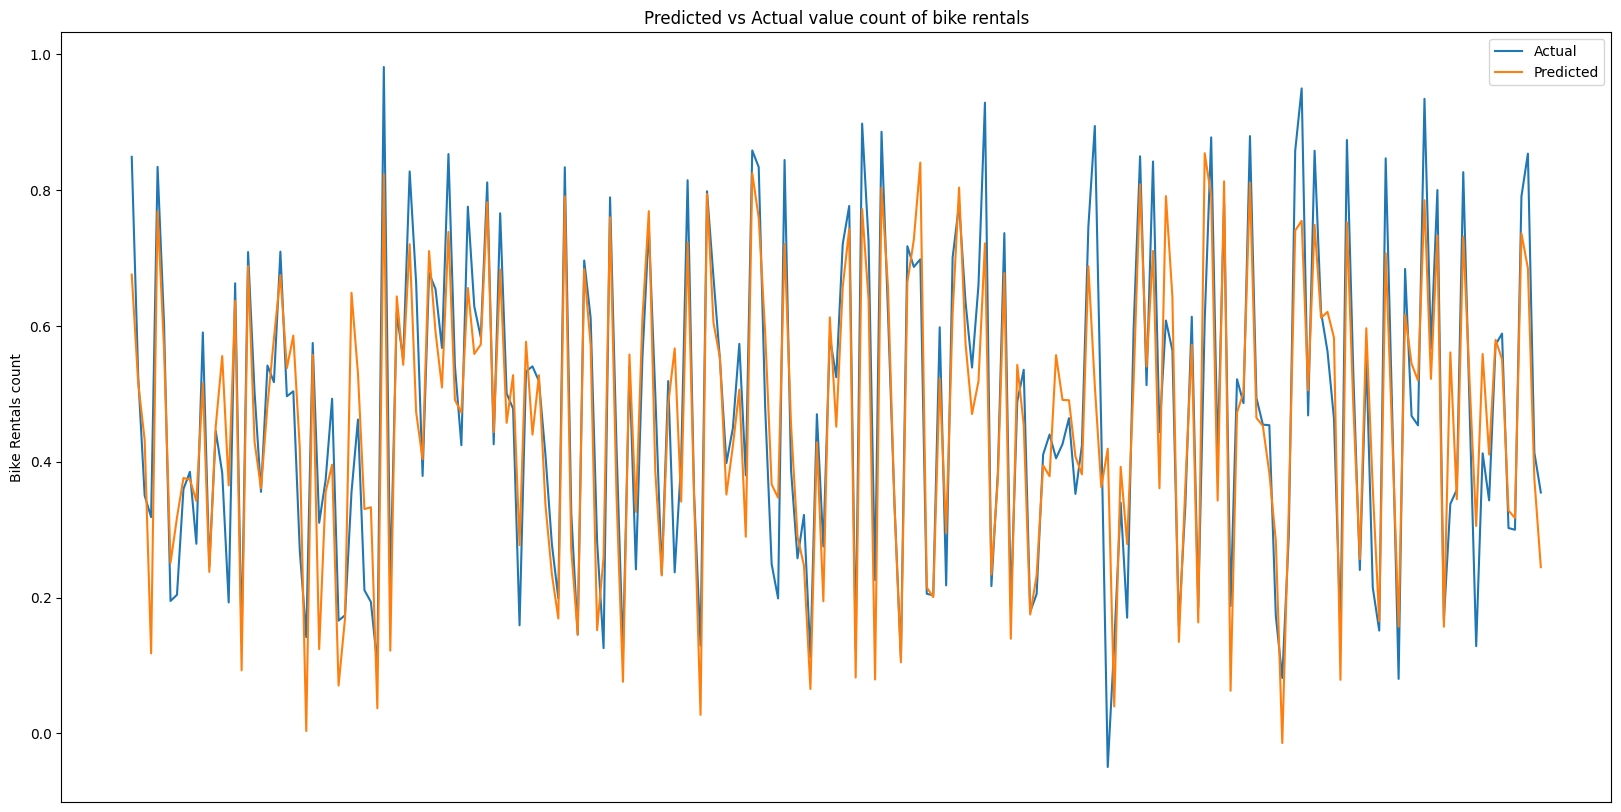

In [182]:
# Plotting Actual vs Predicted
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred_test)),y_pred_test)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual value count of bike rentals');
plt.ylabel('Bike Rentals count')
plt.xticks([])
plt.show()

We see that our model is able to explain the actual values really well from the above graph.

**We can also try to see the overall fit using a Regression plot**

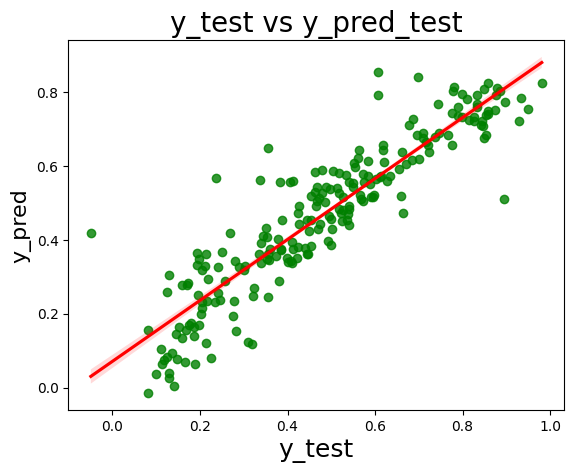

In [183]:
#Plotting a regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred_test, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred_test', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### **Bike Sharing Model Summary:**


---



**Dependent variable**: cnt

**Independent variables and their respective coefficients**:
1. yr                          0.2419
2. holiday                    -0.0747
3. temp                        0.4081
4. windspeed                  -0.0962
5. spring                     -0.1631
6. winter                      0.0846
7. December                   -0.0666
8. July                       -0.0537
9. March                       0.0540
10. November                   -0.0819
11. September                   0.0476
12. Cloudy_Mist                -0.0842
13. Light_Rain_Thunderstorm    -0.2726


---



**Regression Equation**:
cnt = 0.2524 + 0.2419 * yr - 0.0747 * holiday + 0.4081 * temp - 0.0962 * windspeed - 0.1631 * spring + 0.0846 * winter - 0.0666 * December - 0.0537 * July + 0.0540 * March - 0.0819 * November + 0.0476 * September - 0.0842 * Cloudy_Mist - 0.2726 * Light_Rain_Thunderstorm



---


**Final Inferences for Bike Sharing**:
*   yr and temp are our top variables with posiitive coefficients of 0.2419 and 0.4081. Team can consider the positive impact of yr and temp and plan activities accordingly. Since there is an increase from year 2018 to 2019. This trend needs to be utilized for coming years as well.
*   Along with that three other variables have top impact: September, March and winter. Septemnber month marks the start of Fall season and during EDA we saw bike rentals had high count during Fall season. This can be utilized by the team and bike availability can be addressed accordingly to meet the needs and see high rental counts.
*   A cloudy or light rain weather followed by thunderstorm have a negative impact on bike rental counts. This can be seen considering it would be difficult for customers to ride a bike in rainy weather.






